# WEATHER OBERSERVATION OF LONDON - REGRESSION : MODEL BUILDING AND MACHINE LEARNING APPROACH

### NAME : Kanmani A

### DATE: 04.07.2025

### OVERVIEW OF PROBLEM STATMEN

Weather plays a critical role in daily life, urban planning, agriculture, transportation, and energy management. London, being a metropolitan city with highly variable weather conditions, often faces challenges in forecasting rainfall and understanding how different atmospheric factors contribute to it. Meteorological data such as temperature, pressure, sunshine, snow depth, and precipitation are available, the raw dataset contains missing values, anomalies, and quality flags that need preprocessing before meaningful insights can be derived.The Temperature prediction is a Regression problem with imbalanced data

### OBJECTIVE

The objective is to develop accurate regression models for forecasting maximum daily temperature (Q_TX) in London, by leveraging meteorological features, performing robust preprocessing, and extracting meaningful climate insights.Study the distribution of Q_TX and its relationship with other meteorological variables (humidity, sunshine, rainfall, air pressure, etc.) is its basic objective.Identifing the trends, seasonality, and correlations that directly influence maximum temperature.

### Data Description

**Source**: From Kaggle. link: https://www.kaggle.com/datasets/zongaobian/london-weather-data-from-1979-to-2023

### Features:

- **Date** – Daily date (time-series index).

- **Precipitation (mm)**– Amount of rainfall (main variable for target creation).

- **Snow Depth (cm)** – Depth of snow recorded.

- **Mean Temperature (°C)** – Average daily temperature.

- **Max Temperature (°C)** – Daily maximum temperature.

- **Min Temperature (°C)** – Daily minimum temperature.

- **Pressure** – Atmospheric pressure.

- **Sunshine Duration (hours)** – Total hours of sunshine in a day.

- **Global Radiation (W/m²)** – Solar radiation received.

- **Quality_Flag_for_Snow_Depth** – Data quality flag.

- **Quality_Flag_for_Precipitation** – Data quality flag.

- **Quality_Flag_for_Global_Radiation** – Data quality flag.

- **Quality_Flag_for_Pressure** – Data quality flag.

- **Quality_Flag_for_Sunshine** – Data quality flag.

**Target Variable**

- **Temperature Quality** - Tells the Quality of the change in temperature everyday.


In [193]:
### Importing library files

In [194]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

### Data Collection

#### Loading Data

In [196]:
#loading the data set
data =pd.read_csv('london_weather_data.csv')

In [197]:
data

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


### Converting data into dataframe

In [198]:
df=pd.DataFrame(data)

In [199]:
df

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0


In [200]:
# passing first five values
df.head()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
0,19790101,23.0,0,-75.0,0,-41.0,0,70.0,0,9.0,...,4.0,0,52.0,0,10190.0,0,83.0,0,2.0,0
1,19790102,16.0,0,-75.0,0,-26.0,0,17.0,0,8.0,...,0.0,0,27.0,0,10253.0,0,76.0,0,6.0,0
2,19790103,13.0,0,-72.0,0,-28.0,0,0.0,0,4.0,...,0.0,0,13.0,0,10205.0,0,86.0,0,5.0,0
3,19790104,-3.0,0,-65.0,0,-26.0,0,0.0,0,2.0,...,0.0,0,13.0,0,10084.0,0,68.0,0,8.0,0
4,19790105,56.0,0,-14.0,0,-8.0,0,20.0,0,1.0,...,0.0,0,29.0,0,10225.0,0,73.0,0,6.0,0


In [201]:
#passing last five values
df.tail()

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
16431,20231227,126.0,0,55.0,0,89.0,0,0.0,0,0.0,...,46.0,0,12.0,0,10067.0,0,89.0,0,8.0,0
16432,20231228,119.0,0,97.0,0,112.0,0,2.0,0,0.0,...,48.0,0,15.0,0,10051.0,0,81.0,0,7.0,0
16433,20231229,122.0,0,92.0,0,106.0,0,7.0,0,0.0,...,0.0,0,20.0,0,10071.0,0,78.0,0,6.0,0
16434,20231230,107.0,0,56.0,0,89.0,0,0.0,0,0.0,...,56.0,0,12.0,0,10046.0,0,87.0,0,7.0,0
16435,20231231,124.0,0,57.0,0,82.0,0,5.0,0,0.0,...,16.0,0,18.0,0,9891.0,0,85.0,0,7.0,0


#### Checking the shape of the DataFrame

In [204]:
df.shape

(16436, 21)

#### Displaying Columns

In [205]:
df.columns

Index(['DATE', 'TX', 'Q_TX', 'TN', 'Q_TN', 'TG', 'Q_TG', 'SS', 'Q_SS', 'SD',
       'Q_SD', 'RR', 'Q_RR', 'QQ', 'Q_QQ', 'PP', 'Q_PP', 'HU', 'Q_HU', 'CC',
       'Q_CC'],
      dtype='object')

#### Describe the details of the dataseet

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

#### Describe the details of the dataseet

In [207]:
df.describe() 

,DATE,TX,Q_TX,TN,Q_TN,TG,Q_TG,SS,Q_SS,SD,...,RR,Q_RR,QQ,Q_QQ,PP,Q_PP,HU,Q_HU,CC,Q_CC
count,1.643600e+04,16436.000000,16436.000000,16436.000000,16436.000000,16407.000000,16436.000000,16436.000000,16436.0,15361.000000,...,16436.000000,16436.0,16411.00000,16436.000000,16432.000000,16436.00000,16379.000000,16436.000000,16418.000000,16436.000000
mean,2.001066e+07,154.686846,0.068082,76.016427,0.015454,115.373316,0.083962,43.153626,0.0,0.034633,...,16.791738,0.0,119.52020,0.017036,10153.889423,0.00219,76.283717,0.031212,5.256426,0.009978
std,1.298742e+05,65.741246,0.251895,53.392049,0.123353,57.457444,0.451623,39.992648,0.0,0.519639,...,37.614507,0.0,89.26958,0.355343,105.196268,0.14039,10.520699,0.529104,2.091593,0.297885
min,1.979010e+07,-62.000000,0.000000,-118.000000,0.000000,-76.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.00000,0.000000,9596.000000,0.00000,33.000000,0.000000,0.000000,0.000000
25%,1.990040e+07,106.000000,0.000000,36.000000,0.000000,72.000000,0.000000,4.000000,0.0,0.000000,...,0.000000,0.0,42.00000,0.000000,10091.000000,0.00000,69.000000,0.000000,4.000000,0.000000
50%,2.001070e+07,151.000000,0.000000,78.000000,0.000000,114.000000,0.000000,35.000000,0.0,0.000000,...,0.000000,0.0,96.00000,0.000000,10162.000000,0.00000,77.000000,0.000000,6.000000,0.000000
75%,2.012095e+07,204.000000,0.000000,118.000000,0.000000,161.000000,0.000000,71.000000,0.0,0.000000,...,16.000000,0.0,187.00000,0.000000,10225.000000,0.00000,84.000000,0.000000,7.000000,0.000000
max,2.023123e+07,402.000000,1.000000,223.000000,1.000000,309.000000,9.000000,157.000000,0.0,22.000000,...,618.000000,0.0,402.00000,9.000000,10477.000000,9.00000,100.000000,9.000000,9.000000,9.000000


#### Checking Datatypes

In [208]:
df.dtypes

DATE      int64
TX      float64
Q_TX      int64
TN      float64
Q_TN      int64
TG      float64
Q_TG      int64
SS      float64
Q_SS      int64
SD      float64
Q_SD      int64
RR      float64
Q_RR      int64
QQ      float64
Q_QQ      int64
PP      float64
Q_PP      int64
HU      float64
Q_HU      int64
CC      float64
Q_CC      int64
dtype: object

### Data Cleaning and Preprocessing

#### Checking for Duplicates

In [209]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16431    False
16432    False
16433    False
16434    False
16435    False
Length: 16436, dtype: bool

In [210]:
df.duplicated().sum()

np.int64(0)

**No duplicate values found in the Dataset**

### Finding and Handling null values

In [211]:
df.isnull().sum()

DATE       0
TX         0
Q_TX       0
TN         0
Q_TN       0
TG        29
Q_TG       0
SS         0
Q_SS       0
SD      1075
Q_SD       0
RR         0
Q_RR       0
QQ        25
Q_QQ       0
PP         4
Q_PP       0
HU        57
Q_HU       0
CC        18
Q_CC       0
dtype: int64

In [212]:
df.fillna(method='ffill', inplace=True)

In [213]:
df.isnull().sum()

DATE    0
TX      0
Q_TX    0
TN      0
Q_TN    0
TG      0
Q_TG    0
SS      0
Q_SS    0
SD      0
Q_SD    0
RR      0
Q_RR    0
QQ      0
Q_QQ    0
PP      0
Q_PP    0
HU      0
Q_HU    0
CC      0
Q_CC    0
dtype: int64

In [214]:
df.isna().sum()

DATE    0
TX      0
Q_TX    0
TN      0
Q_TN    0
TG      0
Q_TG    0
SS      0
Q_SS    0
SD      0
Q_SD    0
RR      0
Q_RR    0
QQ      0
Q_QQ    0
PP      0
Q_PP    0
HU      0
Q_HU    0
CC      0
Q_CC    0
dtype: int64

In [215]:
df.isna().sum()

DATE    0
TX      0
Q_TX    0
TN      0
Q_TN    0
TG      0
Q_TG    0
SS      0
Q_SS    0
SD      0
Q_SD    0
RR      0
Q_RR    0
QQ      0
Q_QQ    0
PP      0
Q_PP    0
HU      0
Q_HU    0
CC      0
Q_CC    0
dtype: int64

In [216]:
df = df.fillna(df.mode().iloc[0])

In [217]:
df.isna().sum()

DATE    0
TX      0
Q_TX    0
TN      0
Q_TN    0
TG      0
Q_TG    0
SS      0
Q_SS    0
SD      0
Q_SD    0
RR      0
Q_RR    0
QQ      0
Q_QQ    0
PP      0
Q_PP    0
HU      0
Q_HU    0
CC      0
Q_CC    0
dtype: int64

#### unique values from the specific column

In [218]:
df['DATE'].unique() 

array([19790101, 19790102, 19790103, ..., 20231229, 20231230, 20231231],
      shape=(16436,))

### renaming the column

In [219]:
df=df.rename(columns={'TX': 'Daily Max Temp'})

In [220]:
df=df.rename(columns={'TN': 'Daily Min Temp'})

In [221]:
df=df.rename(columns={'TG': 'Daily Mean Temp'})

In [222]:
df=df.rename(columns={'SS': 'Sunshine Duration'})

In [223]:
df=df.rename(columns={'SD': 'Snow Depth'})

In [224]:
df=df.rename(columns={'RR': 'Precipitation Amt'})

In [225]:
df=df.rename(columns={'QQ': 'Global Radiation'})

In [226]:
df=df.rename(columns={'PP': 'Sealevel Pressure'})

In [227]:
df=df.rename(columns={'HU': 'Relative Humidity'})

In [228]:
df=df.rename(columns={'CC': 'Cloud Cover'})

### Replacing Values

In [229]:
df.replace({'Q_TX':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [230]:
df.replace({'Q_TN':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [231]:
df.replace({'Q_SS':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [232]:
df.replace({'Q_RR':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [233]:
df.replace({'Q_QQ':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [234]:
df.replace({'Q_PP':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [235]:
df.replace({'Q_HU':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [236]:
df.replace({'Q_CC':{1:'Suspect',0:'Valid',9:'Missing'}},inplace=True)

In [237]:
df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,Valid,-75.0,Valid,-41.0,0,70.0,Valid,9.0,...,4.0,Valid,52.0,Valid,10190.0,Valid,83.0,Valid,2.0,Valid
1,19790102,16.0,Valid,-75.0,Valid,-26.0,0,17.0,Valid,8.0,...,0.0,Valid,27.0,Valid,10253.0,Valid,76.0,Valid,6.0,Valid
2,19790103,13.0,Valid,-72.0,Valid,-28.0,0,0.0,Valid,4.0,...,0.0,Valid,13.0,Valid,10205.0,Valid,86.0,Valid,5.0,Valid
3,19790104,-3.0,Valid,-65.0,Valid,-26.0,0,0.0,Valid,2.0,...,0.0,Valid,13.0,Valid,10084.0,Valid,68.0,Valid,8.0,Valid
4,19790105,56.0,Valid,-14.0,Valid,-8.0,0,20.0,Valid,1.0,...,0.0,Valid,29.0,Valid,10225.0,Valid,73.0,Valid,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0,0.0,Valid,0.0,...,46.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0,2.0,Valid,0.0,...,48.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0,0.0,Valid,0.0,...,56.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


#### flitering

In [265]:
filtered_df=df[df['Snow Depth']==0.0]

In [266]:
filtered_df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
6,19790107,85.0,Valid,-53.0,Valid,15.0,0,0.0,Valid,0.0,...,52.0,Valid,13.0,Valid,10252.0,Valid,93.0,Valid,8.0,Valid
7,19790108,58.0,Suspect,53.0,Valid,69.0,1,1.0,Valid,0.0,...,8.0,Valid,15.0,Valid,10187.0,Valid,95.0,Valid,8.0,Valid
8,19790109,52.0,Valid,16.0,Valid,37.0,0,58.0,Valid,0.0,...,72.0,Valid,50.0,Valid,10117.0,Valid,86.0,Valid,4.0,Valid
9,19790110,49.0,Valid,14.0,Valid,33.0,0,19.0,Valid,0.0,...,21.0,Valid,30.0,Valid,9870.0,Valid,87.0,Valid,7.0,Valid
10,19790111,29.0,Valid,3.0,Valid,26.0,0,68.0,Valid,0.0,...,23.0,Valid,55.0,Valid,9896.0,Valid,78.0,Valid,1.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0,0.0,Valid,0.0,...,46.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0,2.0,Valid,0.0,...,48.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0,0.0,Valid,0.0,...,56.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


In [267]:
#filter using and operator with two Columns
f1 = df[(df['Snow Depth'] == 0.0) & (df['Precipitation Amt'] == 0.0)]

In [268]:
f1

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
19,19790120,35.0,Valid,-10.0,Valid,31.0,0,0.0,Valid,0.0,...,0.0,Valid,16.0,Valid,10092.0,Valid,93.0,Valid,7.0,Valid
26,19790127,45.0,Valid,-52.0,Valid,-18.0,0,21.0,Valid,0.0,...,0.0,Valid,39.0,Valid,9977.0,Valid,90.0,Valid,4.0,Valid
32,19790202,59.0,Valid,15.0,Valid,28.0,0,14.0,Valid,0.0,...,0.0,Valid,37.0,Valid,9989.0,Valid,82.0,Valid,5.0,Valid
33,19790203,45.0,Valid,-41.0,Valid,9.0,0,87.0,Valid,0.0,...,0.0,Valid,85.0,Valid,10077.0,Valid,82.0,Valid,1.0,Valid
34,19790204,60.0,Valid,-12.0,Valid,16.0,0,1.0,Valid,0.0,...,0.0,Valid,23.0,Valid,10006.0,Valid,89.0,Valid,8.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16420,20231216,121.0,Valid,55.0,Valid,85.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10388.0,Valid,90.0,Valid,8.0,Valid
16421,20231217,128.0,Valid,93.0,Valid,107.0,0,16.0,Valid,0.0,...,0.0,Valid,25.0,Valid,10343.0,Valid,80.0,Valid,8.0,Valid
16424,20231220,144.0,Valid,39.0,Valid,82.0,0,10.0,Valid,0.0,...,0.0,Valid,22.0,Valid,10185.0,Valid,85.0,Valid,5.0,Valid
16426,20231222,136.0,Valid,88.0,Valid,107.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10131.0,Valid,74.0,Valid,7.0,Valid


In [269]:
#sorting
sort_s=df.sort_values(by='Snow Depth')

In [270]:
sort_s

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
16434,20231230,107.0,Valid,56.0,Valid,89.0,0,0.0,Valid,0.0,...,56.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid
16417,20231213,85.0,Valid,76.0,Valid,79.0,0,0.0,Valid,0.0,...,6.0,Valid,12.0,Valid,10032.0,Valid,89.0,Valid,8.0,Valid
16418,20231214,105.0,Valid,25.0,Valid,55.0,0,0.0,Valid,0.0,...,6.0,Valid,12.0,Valid,10219.0,Valid,91.0,Valid,7.0,Valid
16419,20231215,115.0,Valid,40.0,Valid,72.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10358.0,Valid,82.0,Valid,6.0,Valid
16420,20231216,121.0,Valid,55.0,Valid,85.0,0,0.0,Valid,0.0,...,0.0,Valid,12.0,Valid,10388.0,Valid,90.0,Valid,8.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,19820111,24.0,Valid,-53.0,Valid,-18.0,0,70.0,Valid,15.0,...,0.0,Valid,56.0,Valid,10075.0,Valid,80.0,Valid,4.0,Valid
1104,19820109,-8.0,Valid,-36.0,Valid,-26.0,0,0.0,Valid,16.0,...,19.0,Valid,14.0,Valid,10145.0,Valid,88.0,Valid,8.0,Valid
1105,19820110,17.0,Valid,-63.0,Valid,-36.0,0,28.0,Valid,18.0,...,0.0,Valid,35.0,Valid,10111.0,Valid,77.0,Valid,5.0,Valid
1077,19811213,66.0,Valid,-118.0,Valid,-36.0,0,0.0,Valid,20.0,...,157.0,Valid,12.0,Valid,9961.0,Valid,90.0,Valid,7.0,Valid


In [271]:
grouped_df=df.groupby('Snow Depth')['Daily Max Temp'].mean()

In [272]:
grouped_df

Snow Depth
0.0     155.766540
1.0      31.510204
2.0      44.807692
3.0      31.812500
4.0      19.294118
5.0      20.000000
6.0      36.600000
7.0      18.750000
8.0       3.000000
9.0      23.000000
10.0     84.500000
11.0     29.666667
12.0     -9.000000
13.0     10.000000
15.0     24.000000
16.0     -8.000000
18.0     17.000000
20.0     66.000000
22.0     45.000000
Name: Daily Max Temp, dtype: float64

## EDA - Exploratory Data Analysis (EDA)

### Target Variable Analysis 

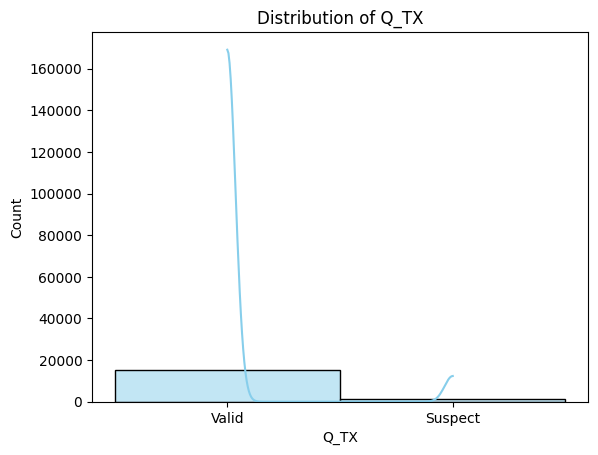

In [273]:
sns.histplot(df['Q_TX'], kde=True, color="skyblue")
plt.title("Distribution of Q_TX")
plt.show()

### Categorical Features

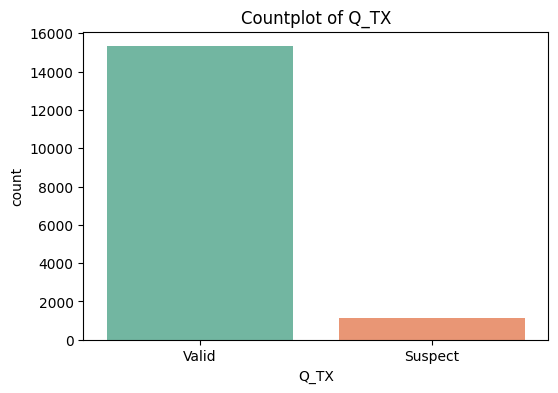

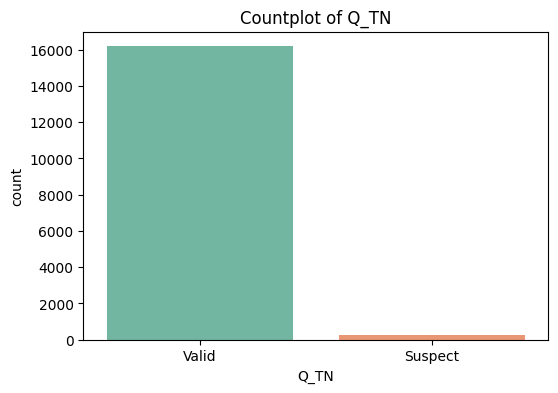

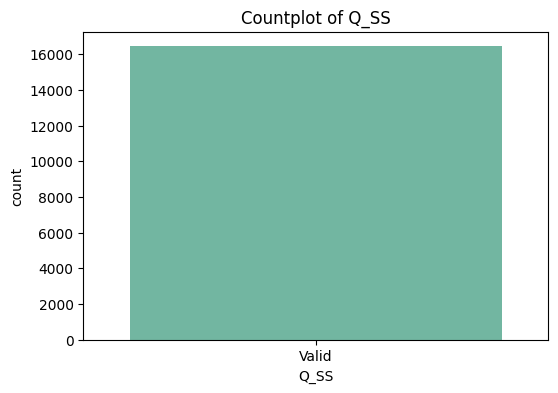

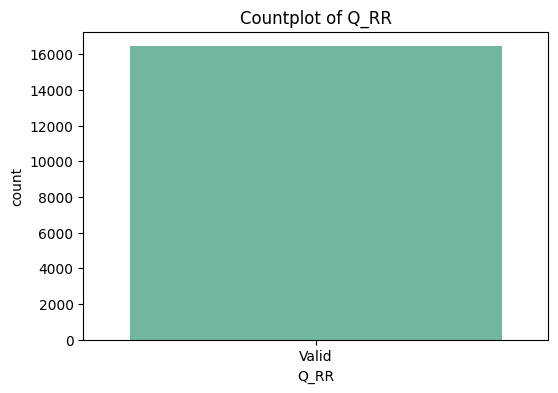

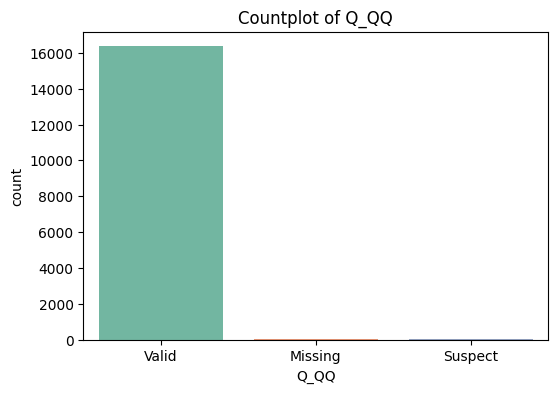

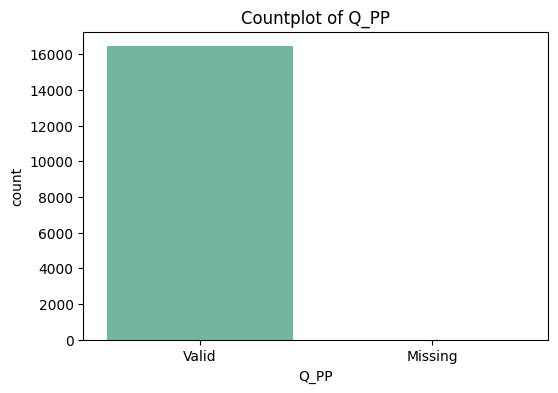

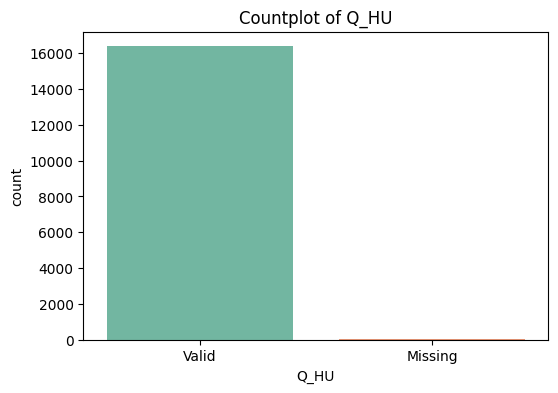

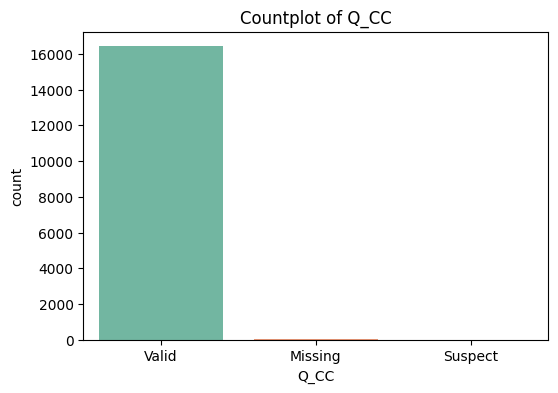

In [276]:
catogorical_cols = df.select_dtypes(include=['object']).columns
for col in catogorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f"Countplot of {col}")
    plt.show()

#### Relation with Target(Q_TX)

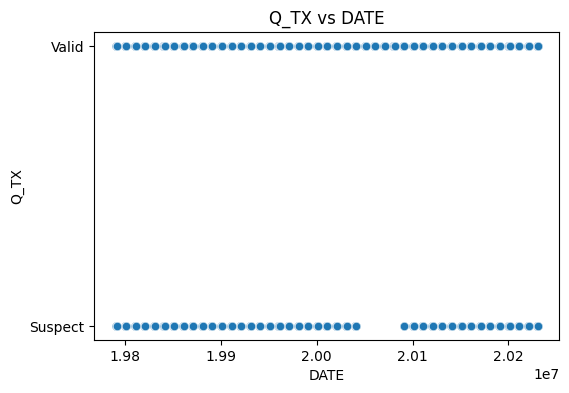

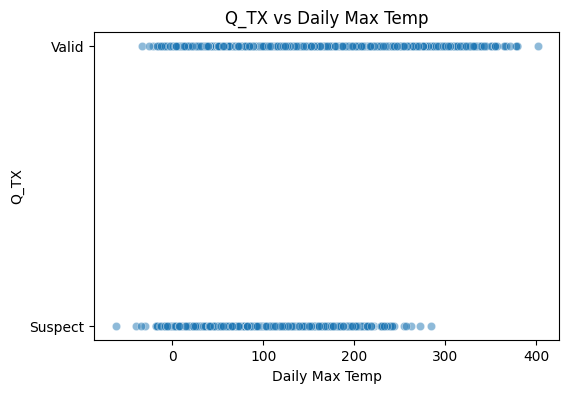

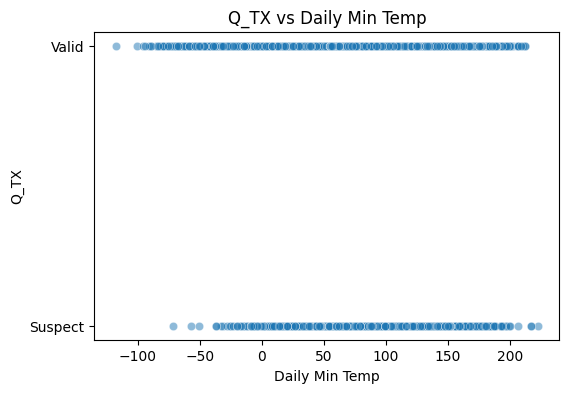

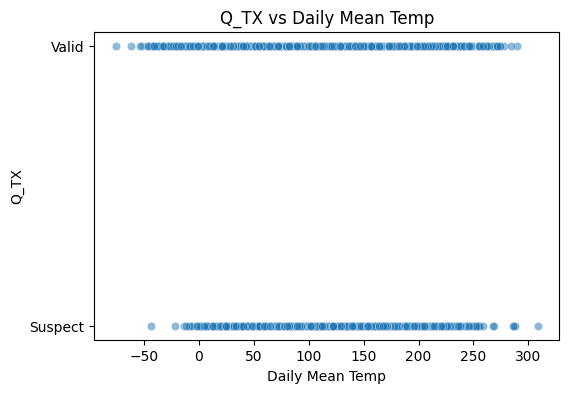

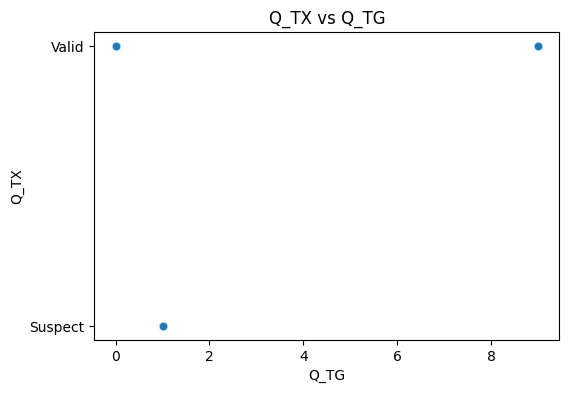

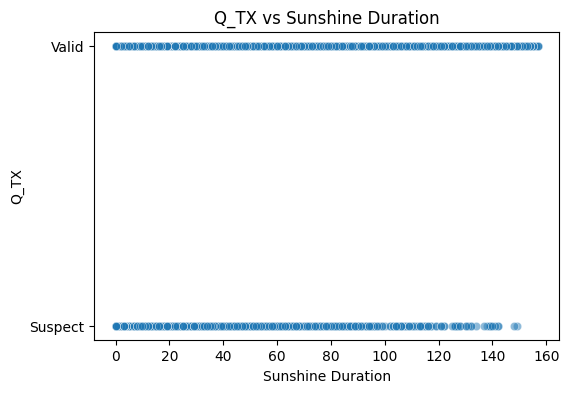

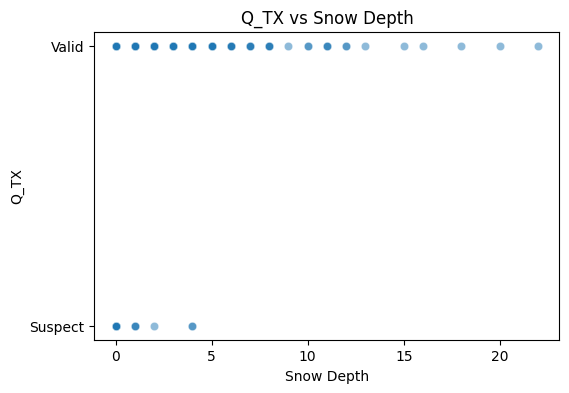

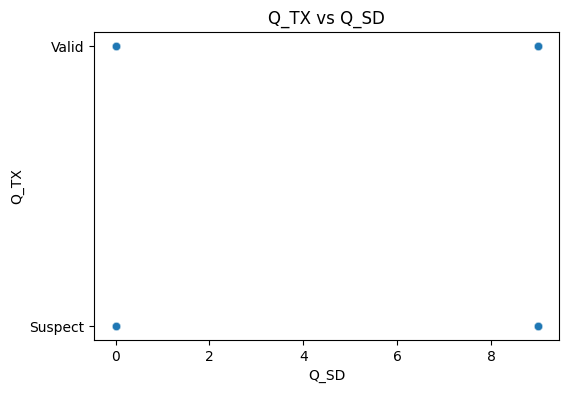

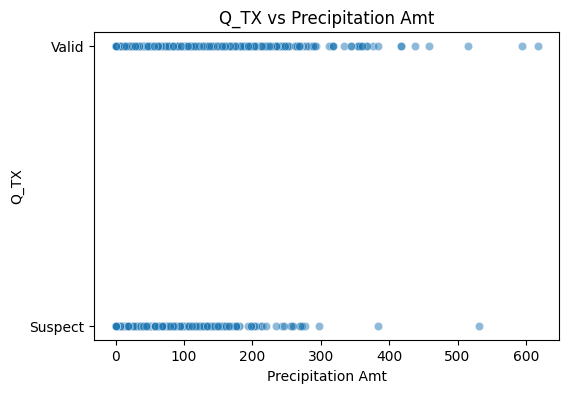

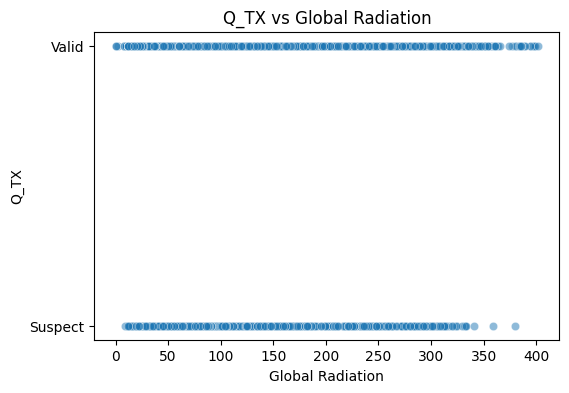

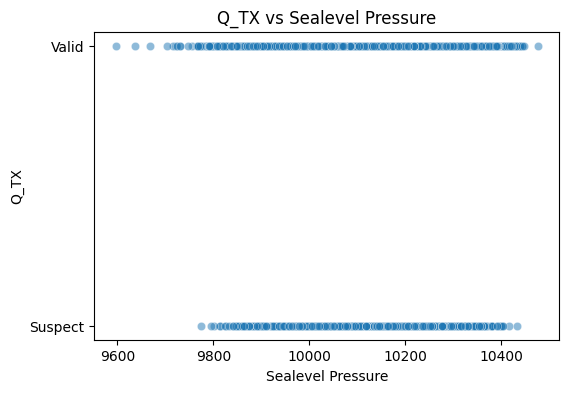

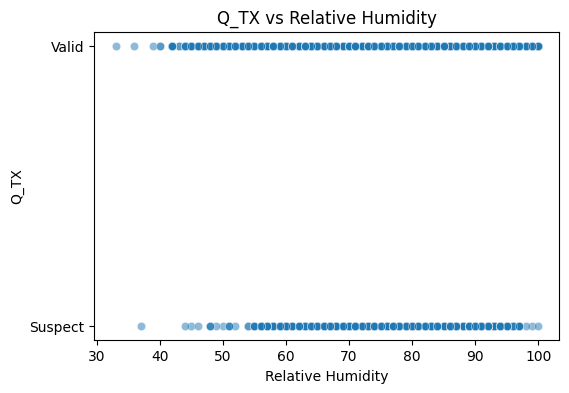

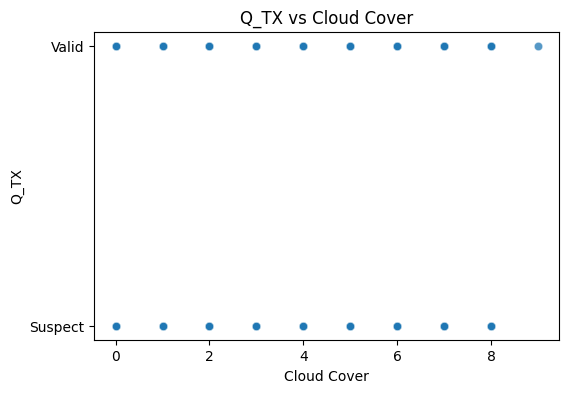

In [278]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    if col != "Q_TX":
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=df[col], y=df['Q_TX'], alpha=0.5)
        plt.title(f"Q_TX vs {col}")
        plt.show()

Text(0.5, 1.0, 'HISTOGRAM')

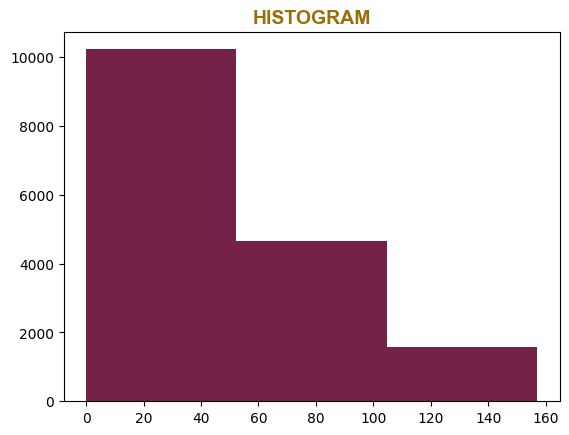

In [63]:
#plotting for Histogram
plt.hist(r,bins=3,color='#752249')#ploting and giving color 
plt.title("HISTOGRAM",fontdict={'fontsize':14,'fontname':'Arial','fontweight':'bold','color':'#9A6E0D'}) #describes the title and font family 


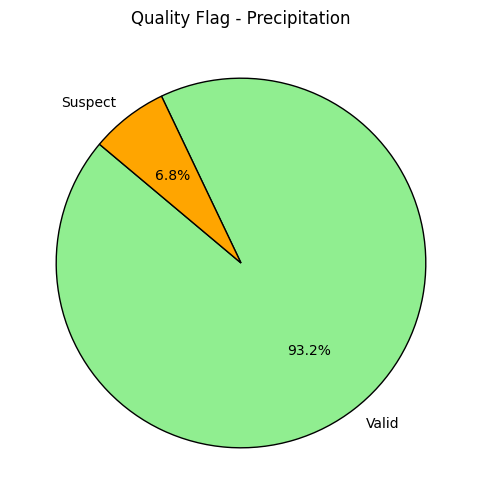

In [281]:
precip_counts = df['Q_TX'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(precip_counts,
        labels=precip_counts.index,
        autopct='%1.1f%%',
        colors=['lightgreen','orange','lightblue'],
        startangle=140,
        wedgeprops={'edgecolor':'black'})
plt.title("Quality Flag - Minimum Temperature")
plt.show()

### Removing the Outliers

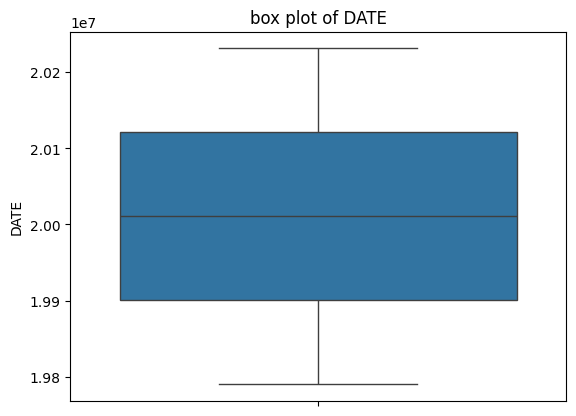

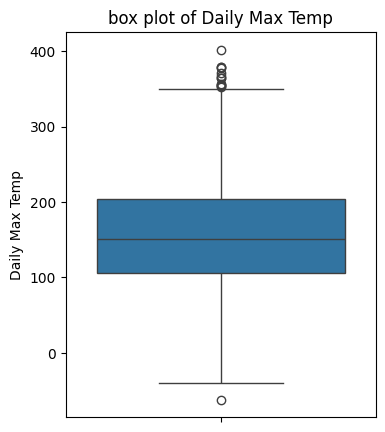

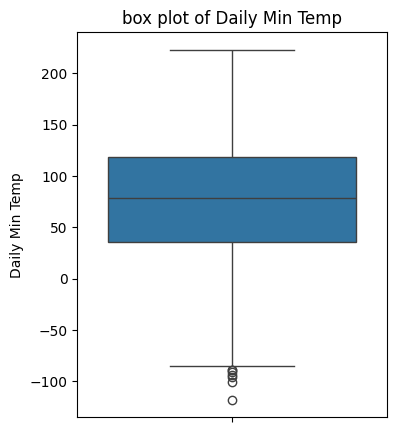

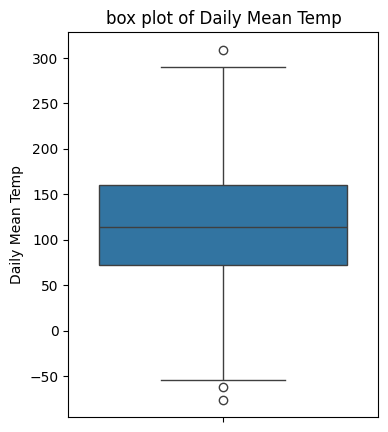

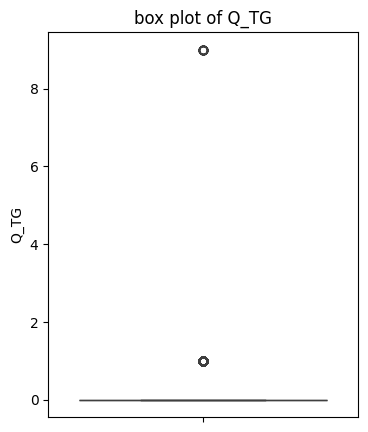

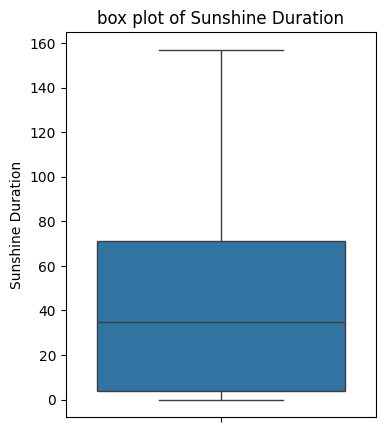

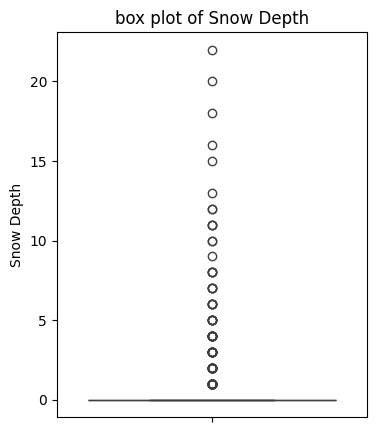

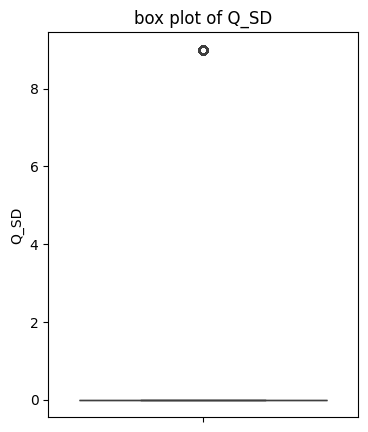

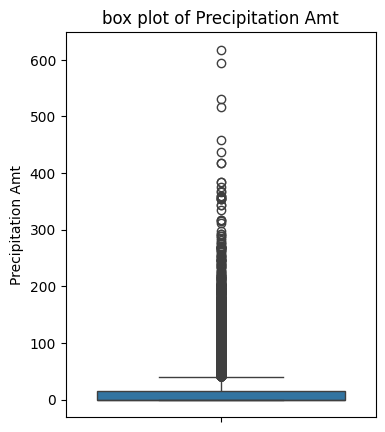

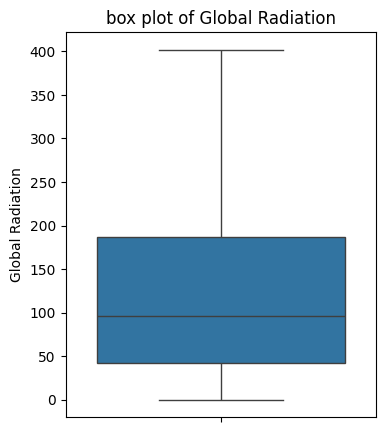

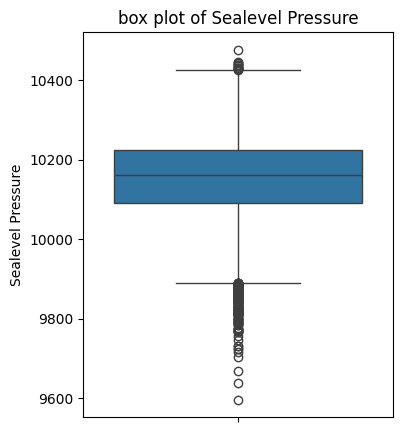

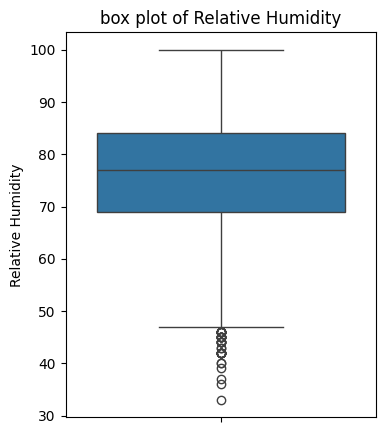

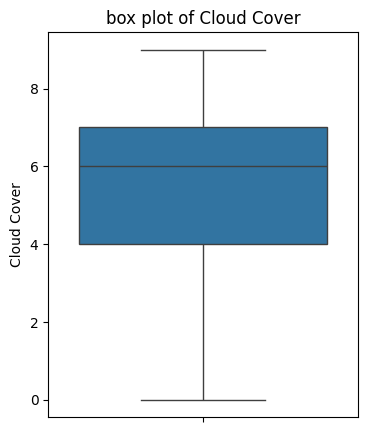

<Figure size 400x500 with 0 Axes>

In [282]:
#box plot for each column
for col in df.select_dtypes(include = 'number').columns: #slecting the numerical columns to remove ouliers 
    sns.boxplot(y=df[col])
    plt.title(f'box plot of {col}')
    plt.figure(figsize=(4,5))

In [283]:
#calculate IQR
for col in df.select_dtypes(include='number').columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    #define bounce
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    #removing outliers
    clean_data=df[(df[col]>=lower_bound)&(df[col]<=upper_bound)][col]

<Axes: ylabel='Cloud Cover'>

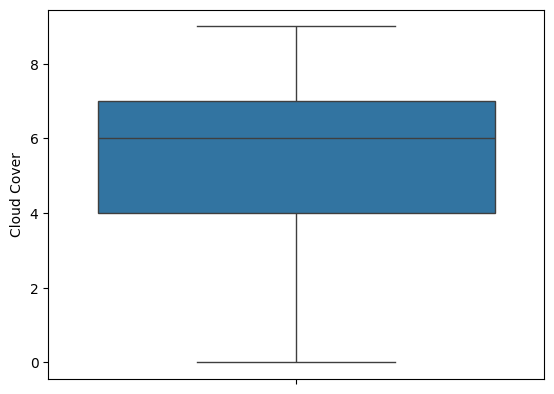

In [284]:
sns.boxplot(y=clean_data)

In [285]:
# Function to apply IQR method to fix outliers
def fix_outliers_iqr(df):
    num=df.select_dtypes(include='number').columns
    for col in num:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
# Replace outliers with the respective bounds
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df

In [286]:
df1=fix_outliers_iqr(df)
df1

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,Valid,-75.0,Valid,-41.0,0.0,70.0,Valid,0.0,...,4.0,Valid,52.0,Valid,10190.0,Valid,83.0,Valid,2.0,Valid
1,19790102,16.0,Valid,-75.0,Valid,-26.0,0.0,17.0,Valid,0.0,...,0.0,Valid,27.0,Valid,10253.0,Valid,76.0,Valid,6.0,Valid
2,19790103,13.0,Valid,-72.0,Valid,-28.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10205.0,Valid,86.0,Valid,5.0,Valid
3,19790104,-3.0,Valid,-65.0,Valid,-26.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10084.0,Valid,68.0,Valid,8.0,Valid
4,19790105,56.0,Valid,-14.0,Valid,-8.0,0.0,20.0,Valid,0.0,...,0.0,Valid,29.0,Valid,10225.0,Valid,73.0,Valid,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0.0,2.0,Valid,0.0,...,40.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0.0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


### Outliers Removed

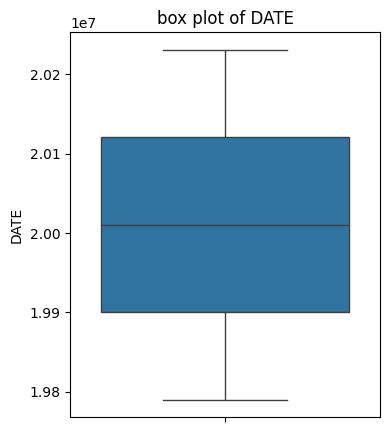

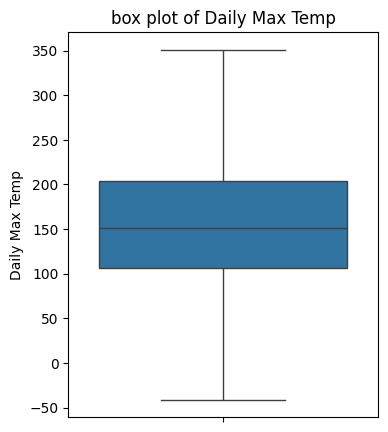

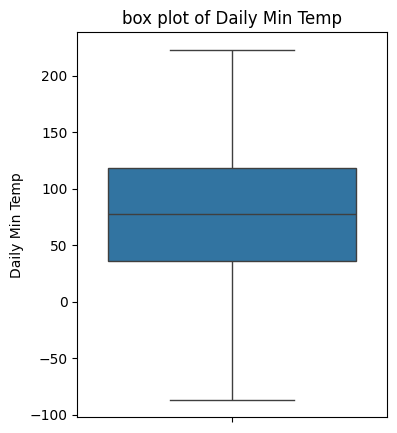

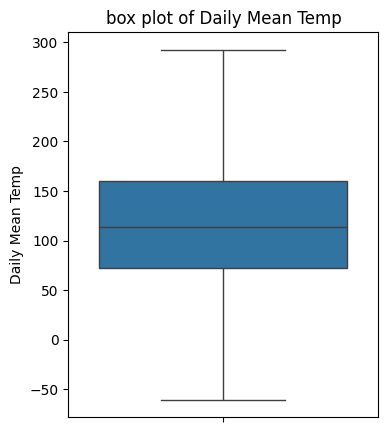

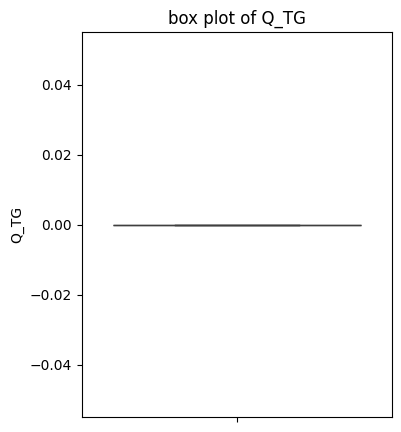

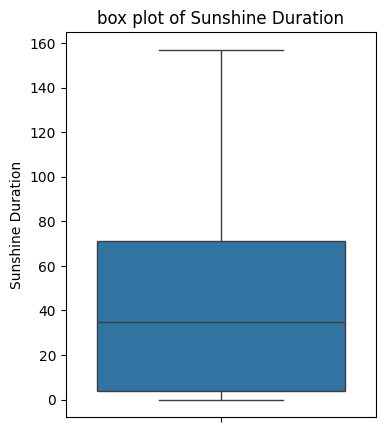

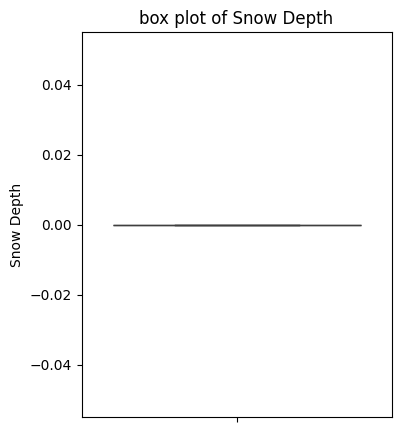

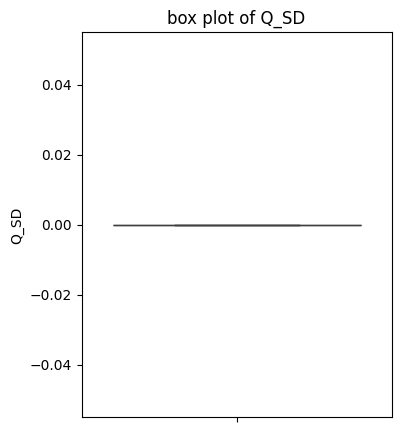

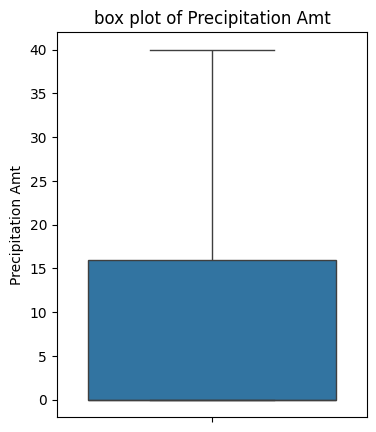

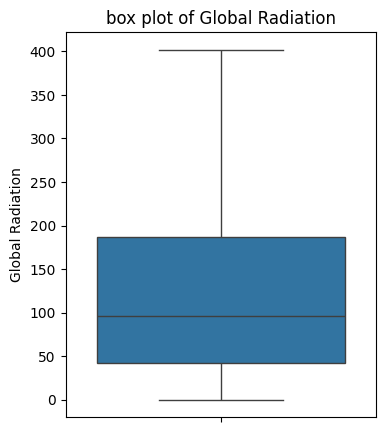

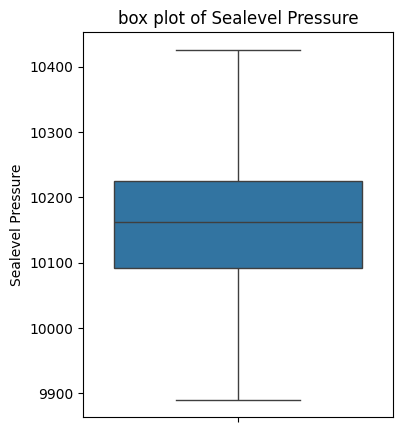

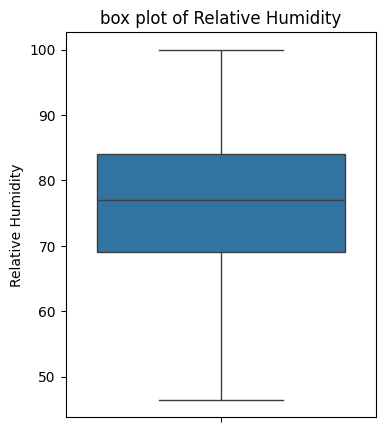

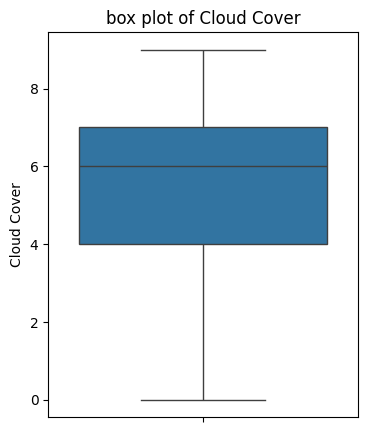

In [288]:
for col in df.select_dtypes(include = 'number').columns:
    plt.figure(figsize=(4,5))
    sns.boxplot(y=df[col])
    plt.title(f'box plot of {col}')

### correlation

In [292]:
#selecting the numerical columns
numeric_columns = df.select_dtypes(include='number')

In [293]:
numeric_columns

,DATE,Daily Max Temp,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Snow Depth,Q_SD,Precipitation Amt,Global Radiation,Sealevel Pressure,Relative Humidity,Cloud Cover
0,19790101,23.0,-75.0,-41.0,0.0,70.0,0.0,0.0,4.0,52.0,10190.0,83.0,2.0
1,19790102,16.0,-75.0,-26.0,0.0,17.0,0.0,0.0,0.0,27.0,10253.0,76.0,6.0
2,19790103,13.0,-72.0,-28.0,0.0,0.0,0.0,0.0,0.0,13.0,10205.0,86.0,5.0
3,19790104,-3.0,-65.0,-26.0,0.0,0.0,0.0,0.0,0.0,13.0,10084.0,68.0,8.0
4,19790105,56.0,-14.0,-8.0,0.0,20.0,0.0,0.0,0.0,29.0,10225.0,73.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,55.0,89.0,0.0,0.0,0.0,0.0,40.0,12.0,10067.0,89.0,8.0
16432,20231228,119.0,97.0,112.0,0.0,2.0,0.0,0.0,40.0,15.0,10051.0,81.0,7.0
16433,20231229,122.0,92.0,106.0,0.0,7.0,0.0,0.0,0.0,20.0,10071.0,78.0,6.0
16434,20231230,107.0,56.0,89.0,0.0,0.0,0.0,0.0,40.0,12.0,10046.0,87.0,7.0


In [294]:
df1=df[['DATE' , 'Daily Max Temp', 'Daily Min Temp','Daily Mean Temp','Sunshine Duration','Precipitation Amt','Global Radiation','Sealevel Pressure','Relative Humidity','Cloud Cover']]
		

In [295]:
cor = df1.corr()

In [296]:
cor

,DATE,Daily Max Temp,Daily Min Temp,Daily Mean Temp,Sunshine Duration,Precipitation Amt,Global Radiation,Sealevel Pressure,Relative Humidity,Cloud Cover
DATE,1.000000,0.095136,0.096000,0.099324,-0.005317,0.013815,0.021027,-0.008392,-0.089425,-0.100956
Daily Max Temp,0.095136,1.000000,0.809278,0.910179,0.469831,-0.121774,0.690790,0.097203,-0.499578,-0.219234
Daily Min Temp,0.096000,0.809278,1.000000,0.955499,0.215560,0.009597,0.478107,-0.080520,-0.314824,0.048571
Daily Mean Temp,0.099324,0.910179,0.955499,1.000000,0.394195,-0.050675,0.635286,-0.001006,-0.446833,-0.115165
Sunshine Duration,-0.005317,0.469831,0.215560,0.394195,1.000000,-0.315881,0.836354,0.229717,-0.731676,-0.755086
Precipitation Amt,0.013815,-0.121774,0.009597,-0.050675,-0.315881,1.000000,-0.229107,-0.455555,0.368076,0.311544
Global Radiation,0.021027,0.690790,0.478107,0.635286,0.836354,-0.229107,1.000000,0.152619,-0.762468,-0.490813
Sealevel Pressure,-0.008392,0.097203,-0.080520,-0.001006,0.229717,-0.455555,0.152619,1.000000,-0.235927,-0.250352
Relative Humidity,-0.089425,-0.499578,-0.314824,-0.446833,-0.731676,0.368076,-0.762468,-0.235927,1.000000,0.508981
Cloud Cover,-0.100956,-0.219234,0.048571,-0.115165,-0.755086,0.311544,-0.490813,-0.250352,0.508981,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

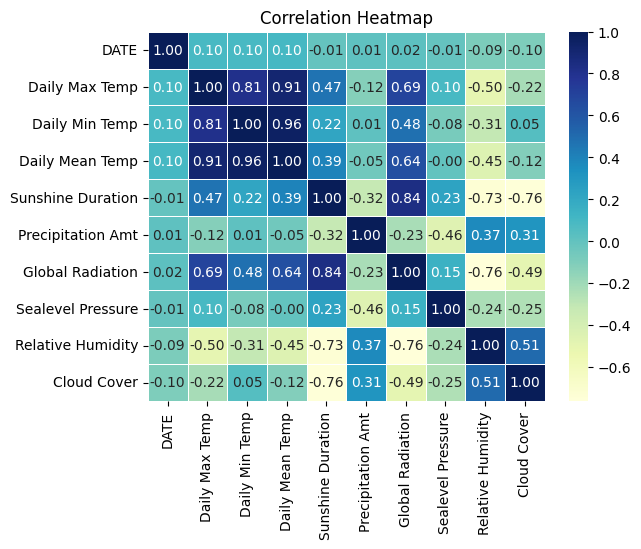

In [297]:
# Plot the heatmap
sns.heatmap(cor,annot=True,cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

### Observation

**☀ Sunshine Duration vs Global Radiation
Expect strong positive correlation (0.8+).
More sunshine directly increases solar radiation, as expected.**

**🌡 Temperature features (Max, Min, Mean Temperature)
Usually show high positive correlation (close to 0.9–1.0).
Redundant predictors are found so may keep Mean Temperature instead of all three to reduce multicollinearity.**

**💧 Precipitation vs Sunshine Duration
Likely negative correlation (more rain → less sunshine).
This  confirms the seasonal/weather patterns.**

### Skewness

In [299]:
cor.skew()

DATE                 2.870677
Daily Max Temp      -0.143218
Daily Min Temp       0.420923
Daily Mean Temp      0.052008
Sunshine Duration   -0.255495
Precipitation Amt    1.294917
Global Radiation    -0.419502
Sealevel Pressure    1.597398
Relative Humidity    0.861425
Cloud Cover          0.673543
dtype: float64

#### Correlation by power transformer method

In [300]:
pt= PowerTransformer(method= 'yeo-johnson')

In [301]:
numeric_cols = cor.select_dtypes(include=['float64', 'int64']).columns

In [302]:
df_transformed = pd.DataFrame(
    pt.fit_transform(df[numeric_cols]),
    columns=numeric_cols
)

In [303]:
df_transformed.skew()

DATE                -0.001946
Daily Max Temp      -0.029291
Daily Min Temp      -0.217980
Daily Mean Temp     -0.101418
Sunshine Duration   -0.262462
Precipitation Amt    0.375000
Global Radiation    -0.098120
Sealevel Pressure   -0.005099
Relative Humidity   -0.064938
Cloud Cover         -0.287391
dtype: float64

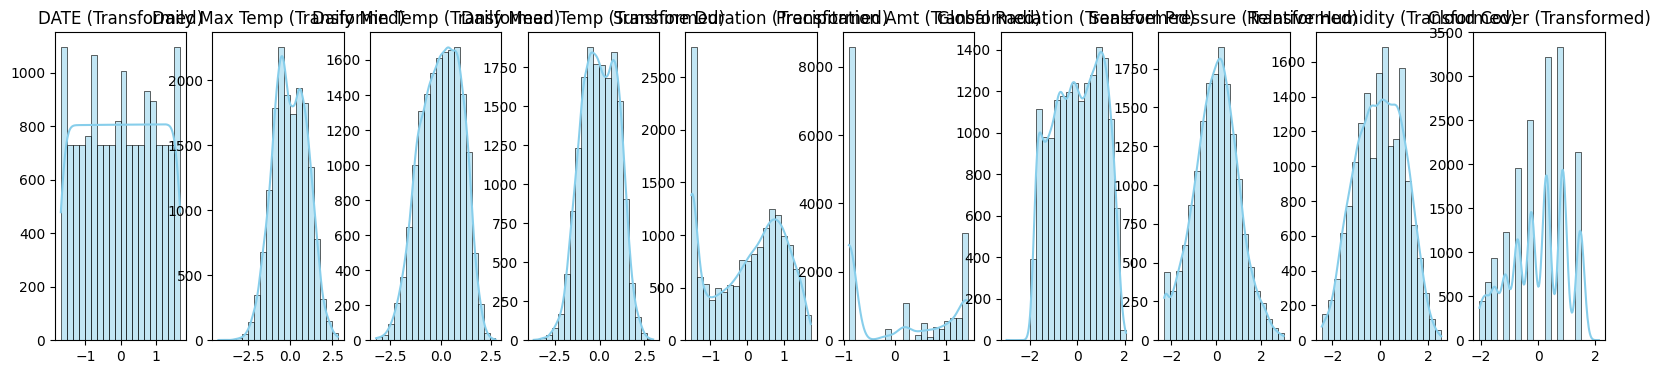

In [304]:
plt.figure(figsize=(20, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, len(numeric_cols), i + 1)
    sns.histplot(df_transformed[col], kde=True, bins=20, color='skyblue')
    plt.title(f"{col} (Transformed)")
    plt.xlabel('')
    plt.ylabel('')

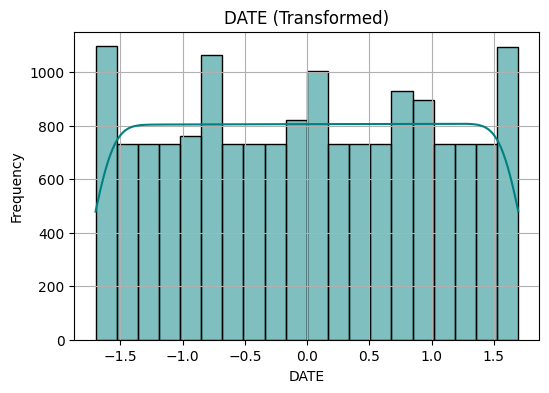

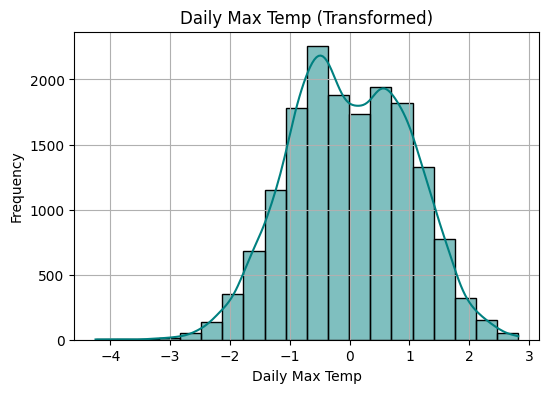

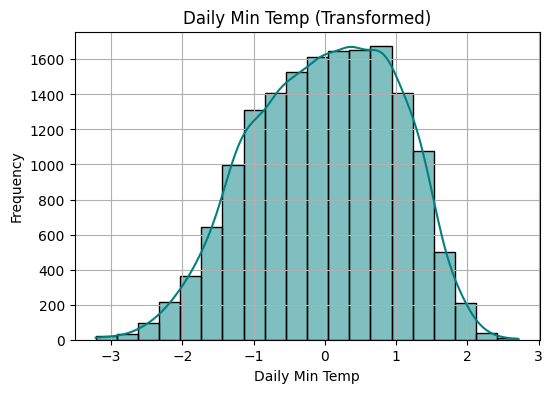

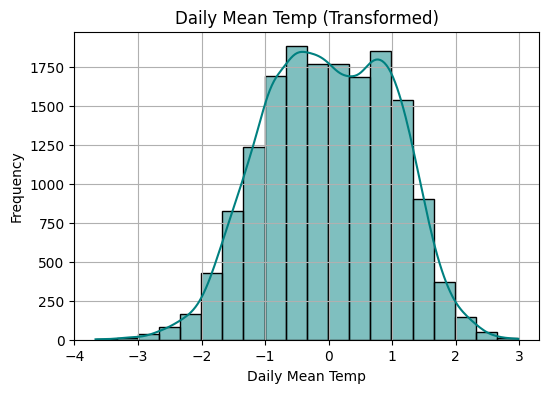

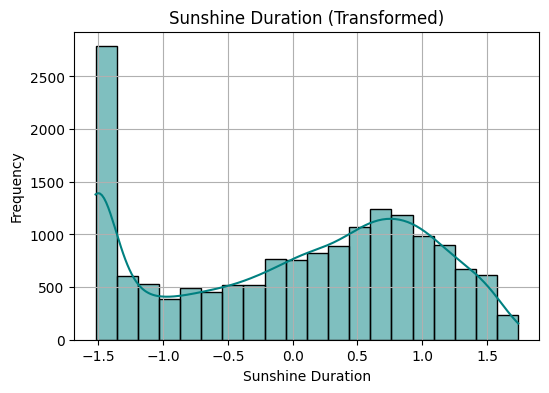

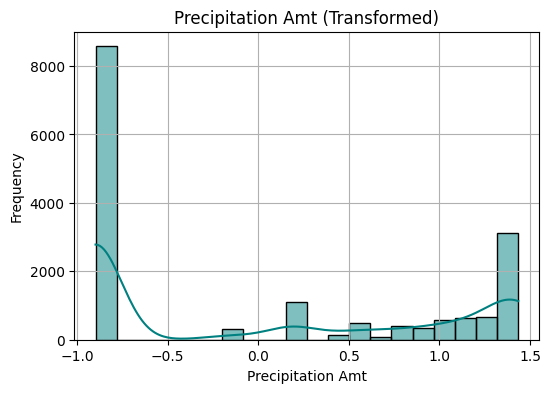

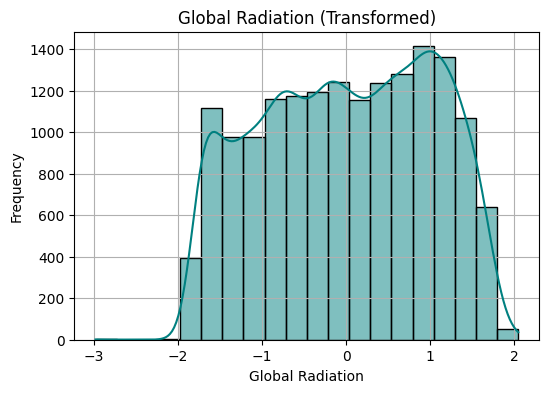

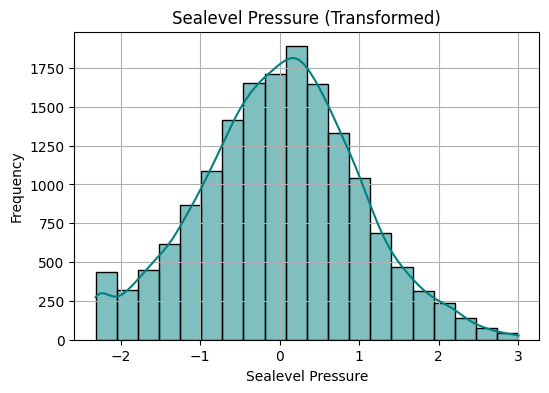

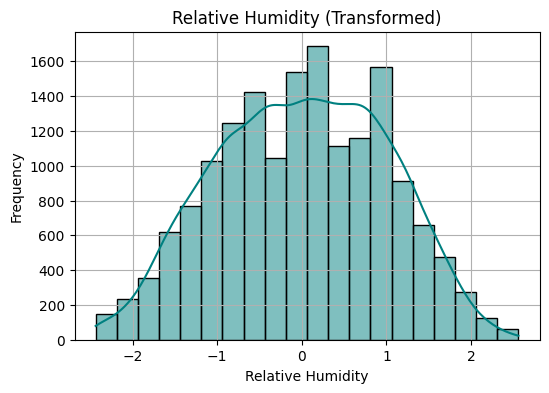

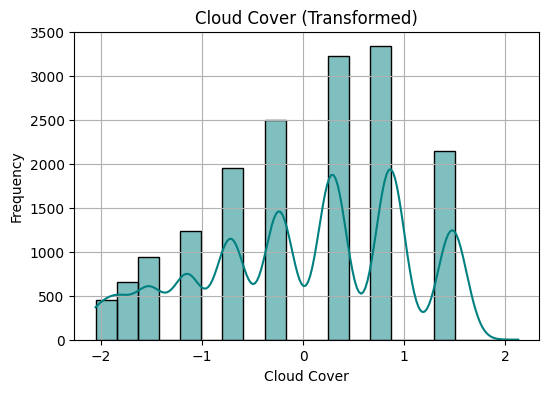

In [305]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_transformed[col], kde=True, bins=20, color='teal')
    plt.title(f"{col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)

**Each histogram + KDE curve represents how a numeric variable looks after transformation.
  The Yeo–Johnson method tries to reduce skewness (make the data more normally distributed).**

In [306]:
df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,Valid,-75.0,Valid,-41.0,0.0,70.0,Valid,0.0,...,4.0,Valid,52.0,Valid,10190.0,Valid,83.0,Valid,2.0,Valid
1,19790102,16.0,Valid,-75.0,Valid,-26.0,0.0,17.0,Valid,0.0,...,0.0,Valid,27.0,Valid,10253.0,Valid,76.0,Valid,6.0,Valid
2,19790103,13.0,Valid,-72.0,Valid,-28.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10205.0,Valid,86.0,Valid,5.0,Valid
3,19790104,-3.0,Valid,-65.0,Valid,-26.0,0.0,0.0,Valid,0.0,...,0.0,Valid,13.0,Valid,10084.0,Valid,68.0,Valid,8.0,Valid
4,19790105,56.0,Valid,-14.0,Valid,-8.0,0.0,20.0,Valid,0.0,...,0.0,Valid,29.0,Valid,10225.0,Valid,73.0,Valid,6.0,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,Valid,55.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10067.0,Valid,89.0,Valid,8.0,Valid
16432,20231228,119.0,Valid,97.0,Valid,112.0,0.0,2.0,Valid,0.0,...,40.0,Valid,15.0,Valid,10051.0,Valid,81.0,Valid,7.0,Valid
16433,20231229,122.0,Valid,92.0,Valid,106.0,0.0,7.0,Valid,0.0,...,0.0,Valid,20.0,Valid,10071.0,Valid,78.0,Valid,6.0,Valid
16434,20231230,107.0,Valid,56.0,Valid,89.0,0.0,0.0,Valid,0.0,...,40.0,Valid,12.0,Valid,10046.0,Valid,87.0,Valid,7.0,Valid


### encoding

#### Label Encoding

In [307]:
le= LabelEncoder()

In [308]:
df['Q_TX']=le.fit_transform(df['Q_TX'])

In [309]:
df['Q_TN']=le.fit_transform(df['Q_TN'])

In [310]:
df['Q_SS']=le.fit_transform(df['Q_SS'])

In [311]:
df['Q_RR']=le.fit_transform(df['Q_RR'])

In [312]:
df['Q_QQ']=le.fit_transform(df['Q_QQ'])

In [313]:
df['Q_PP']=le.fit_transform(df['Q_PP'])

In [314]:
df['Q_HU']=le.fit_transform(df['Q_HU'])

In [315]:
df['Q_CC']=le.fit_transform(df['Q_CC'])

In [316]:
df

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Q_TN,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,...,Precipitation Amt,Q_RR,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC
0,19790101,23.0,1,-75.0,1,-41.0,0.0,70.0,0,0.0,...,4.0,0,52.0,2,10190.0,1,83.0,1,2.0,2
1,19790102,16.0,1,-75.0,1,-26.0,0.0,17.0,0,0.0,...,0.0,0,27.0,2,10253.0,1,76.0,1,6.0,2
2,19790103,13.0,1,-72.0,1,-28.0,0.0,0.0,0,0.0,...,0.0,0,13.0,2,10205.0,1,86.0,1,5.0,2
3,19790104,-3.0,1,-65.0,1,-26.0,0.0,0.0,0,0.0,...,0.0,0,13.0,2,10084.0,1,68.0,1,8.0,2
4,19790105,56.0,1,-14.0,1,-8.0,0.0,20.0,0,0.0,...,0.0,0,29.0,2,10225.0,1,73.0,1,6.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,1,89.0,0.0,0.0,0,0.0,...,40.0,0,12.0,2,10067.0,1,89.0,1,8.0,2
16432,20231228,119.0,1,97.0,1,112.0,0.0,2.0,0,0.0,...,40.0,0,15.0,2,10051.0,1,81.0,1,7.0,2
16433,20231229,122.0,1,92.0,1,106.0,0.0,7.0,0,0.0,...,0.0,0,20.0,2,10071.0,1,78.0,1,6.0,2
16434,20231230,107.0,1,56.0,1,89.0,0.0,0.0,0,0.0,...,40.0,0,12.0,2,10046.0,1,87.0,1,7.0,2


In [317]:
df['Q_TN'].value_counts()

Q_TN
1    16182
0      254
Name: count, dtype: int64

#### One hot encoding

In [318]:
ohe=OneHotEncoder(sparse_output=False)

In [319]:
qnt=ohe.fit_transform(df[['Q_TN']])

In [320]:
cols=ohe.get_feature_names_out(['Q_TN'])

In [321]:
df_encoded=pd.DataFrame(qnt,columns=cols)

In [322]:
merge=pd.concat([df.drop('Q_TN',axis=1),df_encoded],axis=1)

In [323]:
merge

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Global Radiation,Q_QQ,Sealevel Pressure,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC,Q_TN_0,Q_TN_1
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,52.0,2,10190.0,1,83.0,1,2.0,2,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,27.0,2,10253.0,1,76.0,1,6.0,2,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,13.0,2,10205.0,1,86.0,1,5.0,2,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,13.0,2,10084.0,1,68.0,1,8.0,2,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,29.0,2,10225.0,1,73.0,1,6.0,2,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,12.0,2,10067.0,1,89.0,1,8.0,2,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,15.0,2,10051.0,1,81.0,1,7.0,2,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,20.0,2,10071.0,1,78.0,1,6.0,2,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,12.0,2,10046.0,1,87.0,1,7.0,2,0.0,1.0


In [324]:
df['Q_QQ'].value_counts()

Q_QQ
2    16356
1       55
0       25
Name: count, dtype: int64

In [325]:
ohe=OneHotEncoder(sparse_output=False)

In [326]:
qqq=ohe.fit_transform(df[['Q_QQ']])

In [327]:
cols=ohe.get_feature_names_out(['Q_QQ'])

In [328]:
df_encoded=pd.DataFrame(qqq,columns=cols)

In [329]:
df_encoded

,Q_QQ_0,Q_QQ_1,Q_QQ_2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
16431,0.0,0.0,1.0
16432,0.0,0.0,1.0
16433,0.0,0.0,1.0
16434,0.0,0.0,1.0


In [330]:
df2=pd.concat([merge.drop('Q_QQ',axis=1),df_encoded],axis=1)

In [331]:
df2

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_PP,Relative Humidity,Q_HU,Cloud Cover,Q_CC,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,1,83.0,1,2.0,2,0.0,1.0,0.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,1,76.0,1,6.0,2,0.0,1.0,0.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,1,86.0,1,5.0,2,0.0,1.0,0.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,1,68.0,1,8.0,2,0.0,1.0,0.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,1,73.0,1,6.0,2,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,1,89.0,1,8.0,2,0.0,1.0,0.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,1,81.0,1,7.0,2,0.0,1.0,0.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,1,78.0,1,6.0,2,0.0,1.0,0.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,1,87.0,1,7.0,2,0.0,1.0,0.0,0.0,1.0


In [332]:
df['Q_PP'].value_counts()

Q_PP
1    16432
0        4
Name: count, dtype: int64

In [333]:
ohe=OneHotEncoder(sparse_output=False)

In [334]:
qpp=ohe.fit_transform(df[['Q_PP']])

In [335]:
cols=ohe.get_feature_names_out(['Q_PP'])

In [336]:
df_encoded=pd.DataFrame(qpp,columns=cols)

In [337]:
df_encoded

,Q_PP_0,Q_PP_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
16431,0.0,1.0
16432,0.0,1.0
16433,0.0,1.0
16434,0.0,1.0


In [338]:
df3=pd.concat([df2.drop('Q_PP',axis=1),df_encoded],axis=1)

In [339]:
df3

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_HU,Cloud Cover,Q_CC,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,1,2.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,1,6.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,1,5.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,1,8.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,1,6.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,1,8.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,1,7.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,1,6.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,1,7.0,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [340]:
df['Q_HU'].value_counts()

Q_HU
1    16379
0       57
Name: count, dtype: int64

In [341]:
ohe=OneHotEncoder(sparse_output=False)

In [342]:
qhu=ohe.fit_transform(df[['Q_HU']])

In [343]:
cols=ohe.get_feature_names_out(['Q_HU'])

In [344]:
df_encoded=pd.DataFrame(qhu,columns=cols)

In [345]:
df_encoded

,Q_HU_0,Q_HU_1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
16431,0.0,1.0
16432,0.0,1.0
16433,0.0,1.0
16434,0.0,1.0


In [346]:
df4=pd.concat([df3.drop('Q_HU',axis=1),df_encoded],axis=1)

In [347]:
df4

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_CC,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [348]:
df['Q_CC'].value_counts()

Q_CC
2    16416
0       18
1        2
Name: count, dtype: int64

In [349]:
ohe=OneHotEncoder(sparse_output=False)

In [350]:
qcc=ohe.fit_transform(df[['Q_CC']])

In [351]:
cols=ohe.get_feature_names_out(['Q_CC'])

In [352]:
df_encoded=pd.DataFrame(qcc,columns=cols)

In [353]:
df_encoded

,Q_CC_0,Q_CC_1,Q_CC_2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
16431,0.0,0.0,1.0
16432,0.0,0.0,1.0
16433,0.0,0.0,1.0
16434,0.0,0.0,1.0


In [354]:
df5=pd.concat([df4.drop('Q_CC',axis=1),df_encoded],axis=1)

In [355]:
df5

,DATE,Daily Max Temp,Q_TX,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,...,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1,Q_CC_0,Q_CC_1,Q_CC_2
0,19790101,23.0,1,-75.0,-41.0,0.0,70.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,19790102,16.0,1,-75.0,-26.0,0.0,17.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,19790103,13.0,1,-72.0,-28.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,19790104,-3.0,1,-65.0,-26.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,19790105,56.0,1,-14.0,-8.0,0.0,20.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,20231227,126.0,1,55.0,89.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
16432,20231228,119.0,1,97.0,112.0,0.0,2.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
16433,20231229,122.0,1,92.0,106.0,0.0,7.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
16434,20231230,107.0,1,56.0,89.0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
print('length of original data frame ',len(df5))

In [357]:
df['Q_TX'].value_counts()

Q_TX
1    15317
0     1119
Name: count, dtype: int64

### Smote

In [360]:
#smoting technique to balance x and y value counts
smote=SMOTE()

In [361]:
x_smote, y_smote =smote.fit_resample(df5[(i for i in list (df5.describe(include='all').columns)if i !='Q_TX')],df5['Q_TX'])

In [362]:
print('length of y smote', len(y_smote))

length of y smote 30634


In [363]:
balanced_df=pd.DataFrame(x_smote, columns=list(i for i in list(df5.describe(include='all').columns)if i!='Q_TX'))

In [364]:
balanced_df

,DATE,Daily Max Temp,Daily Min Temp,Daily Mean Temp,Q_TG,Sunshine Duration,Q_SS,Snow Depth,Q_SD,Precipitation Amt,...,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1,Q_CC_0,Q_CC_1,Q_CC_2
0,19790101,23.000000,-75.000000,-41.000000,0.0,70.000000,0,0.0,0.0,4.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,19790102,16.000000,-75.000000,-26.000000,0.0,17.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,19790103,13.000000,-72.000000,-28.000000,0.0,0.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,19790104,-3.000000,-65.000000,-26.000000,0.0,0.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,19790105,56.000000,-14.000000,-8.000000,0.0,20.000000,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,19900212,97.659478,83.219826,108.066086,0.0,18.691829,0,0.0,0.0,31.395825,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
30630,20150105,63.588680,75.631129,84.808490,0.0,46.850938,0,0.0,0.0,36.028299,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
30631,19831113,104.829170,85.091408,108.388111,0.0,31.859639,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
30632,20121146,86.480062,73.491530,99.602945,0.0,36.442924,0,0.0,0.0,0.000000,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [365]:
print('length of y smote', len(y_smote))

length of y smote 30634


In [366]:
balanced_df['Q_TX'] = y_smote

In [367]:
balanced_df.shape

(30634, 28)

In [368]:
balanced_df['Q_TX'].value_counts()

Q_TX
1    15317
0    15317
Name: count, dtype: int64

In [415]:
balanced_df.to_csv("balanced dataset.csv",index=False)

### Feature Engineering

In [382]:
#K best feature selection
skb=SelectKBest(score_func=f_regression,k=20)

In [383]:
balanced_df.columns

Index(['DATE', 'Daily Max Temp', 'Daily Min Temp', 'Daily Mean Temp', 'Q_TG',
       'Sunshine Duration', 'Q_SS', 'Snow Depth', 'Q_SD', 'Precipitation Amt',
       'Q_RR', 'Global Radiation', 'Sealevel Pressure', 'Relative Humidity',
       'Cloud Cover', 'Q_TN_0', 'Q_TN_1', 'Q_QQ_0', 'Q_QQ_1', 'Q_QQ_2',
       'Q_PP_0', 'Q_PP_1', 'Q_HU_0', 'Q_HU_1', 'Q_CC_0', 'Q_CC_1', 'Q_CC_2',
       'Q_TX'],
      dtype='object')

In [384]:
Y=balanced_df['Q_TX']

In [385]:
X=balanced_df.drop('Q_TX',axis=1)

In [386]:
X.columns

Index(['DATE', 'Daily Max Temp', 'Daily Min Temp', 'Daily Mean Temp', 'Q_TG',
       'Sunshine Duration', 'Q_SS', 'Snow Depth', 'Q_SD', 'Precipitation Amt',
       'Q_RR', 'Global Radiation', 'Sealevel Pressure', 'Relative Humidity',
       'Cloud Cover', 'Q_TN_0', 'Q_TN_1', 'Q_QQ_0', 'Q_QQ_1', 'Q_QQ_2',
       'Q_PP_0', 'Q_PP_1', 'Q_HU_0', 'Q_HU_1', 'Q_CC_0', 'Q_CC_1', 'Q_CC_2'],
      dtype='object')

In [387]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
30629    0
30630    0
30631    0
30632    0
30633    0
Name: Q_TX, Length: 30634, dtype: int64

In [388]:
X_new=skb.fit_transform(X,Y)
X_new

array([[ 1.97901010e+07,  2.30000000e+01, -7.50000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.97901020e+07,  1.60000000e+01, -7.50000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.97901030e+07,  1.30000000e+01, -7.20000000e+01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [ 1.98311130e+07,  1.04829170e+02,  8.50914082e+01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.01211460e+07,  8.64800623e+01,  7.34915295e+01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.99709650e+07,  1.58391786e+02,  1.04798240e+02, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
      shape=(30634, 20))

In [389]:
selected_columns=X.columns[skb.get_support()]

In [390]:
selected_columns

Index(['DATE', 'Daily Max Temp', 'Daily Min Temp', 'Sunshine Duration',
       'Precipitation Amt', 'Global Radiation', 'Sealevel Pressure',
       'Relative Humidity', 'Cloud Cover', 'Q_TN_0', 'Q_TN_1', 'Q_QQ_0',
       'Q_QQ_1', 'Q_QQ_2', 'Q_PP_0', 'Q_PP_1', 'Q_HU_0', 'Q_HU_1', 'Q_CC_0',
       'Q_CC_2'],
      dtype='object')

#### Feature Selection

In [392]:
feature_scores =pd.DataFrame({'feature':X.columns,'score':skb.scores_}).sort_values(by='score',ascending=False)

In [393]:
feature_scores

,feature,score
1,Daily Max Temp,7302.642580
16,Q_TN_1,6248.927885
15,Q_TN_0,6248.927885
11,Global Radiation,1716.324175
14,Cloud Cover,1357.953435
5,Sunshine Duration,1303.112433
9,Precipitation Amt,1093.241414
13,Relative Humidity,867.839282
12,Sealevel Pressure,807.531910
2,Daily Min Temp,450.879903


In [394]:
X_selected=X[selected_columns]

In [395]:
X_selected

,DATE,Daily Max Temp,Daily Min Temp,Sunshine Duration,Precipitation Amt,Global Radiation,Sealevel Pressure,Relative Humidity,Cloud Cover,Q_TN_0,Q_TN_1,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1,Q_CC_0,Q_CC_2
0,19790101,23.000000,-75.000000,70.000000,4.000000,52.000000,10190.000000,83.000000,2.000000,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,19790102,16.000000,-75.000000,17.000000,0.000000,27.000000,10253.000000,76.000000,6.000000,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
2,19790103,13.000000,-72.000000,0.000000,0.000000,13.000000,10205.000000,86.000000,5.000000,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,19790104,-3.000000,-65.000000,0.000000,0.000000,13.000000,10084.000000,68.000000,8.000000,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,19790105,56.000000,-14.000000,20.000000,0.000000,29.000000,10225.000000,73.000000,6.000000,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30629,19900212,97.659478,83.219826,18.691829,31.395825,44.438960,9953.538781,84.362782,7.406609,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30630,20150105,63.588680,75.631129,46.850938,36.028299,41.425469,10260.079853,71.397170,3.264780,0.86761,0.13239,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30631,19831113,104.829170,85.091408,31.859639,0.000000,44.947052,10215.611889,84.558941,5.764236,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
30632,20121146,86.480062,73.491530,36.442924,0.000000,46.171488,10239.454391,81.962862,4.037138,0.00000,1.00000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [414]:
X_selected.to_csv("featured dataset.csv",index=False)

### scaling

In [397]:
ss=StandardScaler()

In [398]:
X_scaled=ss.fit_transform(X_selected)

In [399]:
X_scaled

array([[-1.64221381, -1.63312069, -3.14892331, ...,  0.05030241,
        -0.02424722,  0.02555965],
       [-1.64220624, -1.74009792, -3.14892331, ...,  0.05030241,
        -0.02424722,  0.02555965],
       [-1.64219867, -1.78594531, -3.08844519, ...,  0.05030241,
        -0.02424722,  0.02555965],
       ...,
       [-1.33174545, -0.38256949,  0.07841918, ...,  0.05030241,
        -0.02424722,  0.02555965],
       [ 0.86385754, -0.66298904, -0.15542711, ...,  0.05030241,
        -0.02424722,  0.02555965],
       [-0.27304017,  0.43599915,  0.47569656, ...,  0.05030241,
        -0.02424722,  0.02555965]], shape=(30634, 20))

### train,test and split

In [401]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=40)

In [402]:
print("X_train shape" ,X_train.shape)

X_train shape (24507, 20)


In [403]:
print("Y_train shape",Y_train.shape)

Y_train shape (24507,)


In [404]:
print("X_test shape",X_test.shape)

X_test shape (6127, 20)


In [405]:
print("Y_test shape",Y_test.shape)

Y_test shape (6127,)


In [406]:
Y.value_counts()

Q_TX
1    15317
0    15317
Name: count, dtype: int64

## Machine Learning

In [407]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "SVR":SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

In [408]:
metrics = []
for name, model in models.items():            
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),                     #Measures average absolute error.
        "MSE": round(mse, 2),                     #Squared version of errors, penalizes large mistakes.
        "RMSE": round(rmse, 2),                   #Square root of MSE
        "R² Score": round(r2, 4)                  #Measures how well the regression explains variance in target.
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)

               Model   MAE   MSE  RMSE  R² Score
0  Linear Regression  0.25  0.09  0.30    0.6465
1      Decision Tree  0.05  0.05  0.22    0.8061
2      Random Forest  0.06  0.02  0.15    0.9053
3                SVR  0.15  0.05  0.22    0.8080
4  Gradient Boosting  0.15  0.04  0.21    0.8250


### Hyperparameter Tuning

In [188]:
# Pipeline with scaling with Random forest Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('gbr', RandomForestRegressor(random_state=42))
])

In [189]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

**Hyperparameter Tuning is done using GridSearch cross validation for RandomForestRegressor**

In [190]:
gridsearch= GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=param_grid,
                         cv=5,                                   #5-fold cross-validation                  
                         scoring='r2',                     
                         n_jobs= -1,
                         error_score="raise",
                         verbose=1)   

In [192]:
gridsearch.fit(X_train, Y_train)                          #fitting

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [247]:
print("✅ Best Parameters:", gridsearch.best_params_)      # Best parameters & score
print("🏆 Best R² Score:", gridsearch.best_score_)

✅ Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
🏆 Best R² Score: 0.8969694140363998


In [248]:
best_model= gridsearch.best_estimator_

**This estimator gives the RandomForestRegressor with the best parameters already trained on the full training set.**

In [249]:
y_pred= best_model.predict(X_test)

In [252]:
mae = mean_absolute_error(Y_test, y_pred)              # Average absolute difference between actual & predicted
mse = mean_squared_error(Y_test, y_pred)               # Average squared difference (penalizes larger errors)
rmse = np.sqrt(mse)                                    # Root of MSE, error in same scale as target
r2 = r2_score(Y_test, y_pred)                          # Variance explained by model (0–1 scale)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 0.09
MSE       : 0.02
RMSE      : 0.15
R² Score  : 0.9069


### Creating pipeline

In [253]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if required)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', RandomForestRegressor(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, Y_train)
# Predict
y_pred = pipeline.predict(X_test)

In [255]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 0.06
MSE       : 0.02
RMSE      : 0.15
R² Score  : 0.9041


### Saving

**saving (serializing) and loading (deserializing) models or objects**

In [256]:
joblib.dump(pipeline,'Weather.joblib')

['Weather.joblib']

In [257]:
loaded_pipeline=joblib.load('Weather.joblib')

#### Predicting unseen data

In [417]:
df_unseen=pd.read_csv('unseen_data.csv')
df_unseen

,DATE,Daily Max Temp,Daily Min Temp,Sunshine Duration,Precipitation Amt,Global Radiation,Sealevel Pressure,Relative Humidity,Cloud Cover,Q_TN_0,...,Q_QQ_0,Q_QQ_1,Q_QQ_2,Q_PP_0,Q_PP_1,Q_HU_0,Q_HU_1,Q_CC_0,Q_CC_2,Q_TX
0,19790101,23,-75,70,4,52,10190,83,2,0,...,0,0,1,0,1,0,1,0,1,1
1,19790102,16,-75,17,0,27,10253,76,6,0,...,0,0,1,0,1,0,1,0,1,1
2,19790103,13,-72,0,0,13,10205,86,5,0,...,0,0,1,0,1,0,1,0,1,1
3,19790104,-3,-65,0,0,13,10084,68,8,0,...,0,0,1,0,1,0,1,0,1,1
4,19790105,56,-14,20,0,29,10225,73,6,0,...,0,0,1,0,1,0,1,0,1,1
5,19790106,83,-66,38,7,39,10278,84,5,0,...,0,0,1,0,1,0,1,0,1,1
6,19790107,85,-53,0,40,13,10252,93,8,0,...,0,0,1,0,1,0,1,0,1,1
7,19790108,58,53,1,8,15,10187,95,8,0,...,0,0,1,0,1,0,1,0,1,0
8,19790109,52,16,58,40,50,10117,86,4,0,...,0,0,1,0,1,0,1,0,1,1
9,19790110,49,14,19,21,30,9890,87,7,0,...,0,0,1,0,1,0,1,0,1,1


In [418]:
x_unseen=df_unseen.drop("Q_TX", axis=1)         # Features (everything except target)
y_unseen=df_unseen['Q_TX']                      # Target (Profit column)

### generating predictions for the unseen dataset using the trained pipeline

In [419]:
y_unseen_pred=loaded_pipeline.predict(x_unseen)  

In [420]:
df_unseen['predicted']=y_unseen_pred

In [427]:
# Example unseen single row 
unseen_weather = pd.DataFrame([{
    'DATE': 19790108,
    'Daily Max Temp':58,
    'Daily Min Temp':53,
    'Sunshine Duration':1,
    'Precipitation Amt':8,
    'Global Radiation':15,
    'Sealevel Pressure':10187,
    'Relative Humidity':95,
    'Cloud Cover':8,
    'Q_TN_0':0,
    'Q_TN_1':1,
    'Q_QQ_0':0,
    'Q_QQ_1':1,
    'Q_PP_0':0,
    'Q_PP_1':1,
    'Q_HU_0':1,
    'Q_HU_1':0,  
    'Q_CC_0':0,
    'Q_CC_2':1,
    'Q_TX':1,
       
}])

# Predict using the trained pipeline
predicted_weather = pipeline.predict(unseen_weather)
print("Predicted Temperature is correct ")

Predicted Temperature is correct 


### Conclusion with Executive Summary

The dataset provided with strong predictive power for temperature regression.Ensemble models (Random Forest, Gradient Boosting) were the best performers but need regularization for better performance.Temperature and sunshine are the strongest indicators of about the rainfall and change of heat.Weather variables are highly interdependent (temp, humidity, sunshine).For practical useage a balanced classification model (e.g., Random Forest with class weights) is preferable.

### Future Scope

- Use time-series models (ARIMA, LSTMs) to capture seasonal weather patterns.
- Apply SMOTE or resampling techniques to balance rainfall classes.
- Deploy the model as a weather prediction API/dashboard.
- Compare with real meteorological forecasts for validation.